<a href="https://colab.research.google.com/github/Tricky1010/Innovate-2024/blob/main/Fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Load and inspect the datasets
import pandas as pd


In [6]:
# Specify the paths to your CSV files
true_csv_file_path = '/content/True.csv'
false_csv_file_path = '/content/Fake.csv'

In [13]:
# Load the CSV files into DataFrames
true_news = pd.read_csv(true_csv_file_path)
fake_news = pd.read_csv(false_csv_file_path)

In [14]:
# Add a label column to both datasets
true_news['label'] = 'REAL'
fake_news['label'] = 'FAKE'

In [15]:
# Combine the datasets
data = pd.concat([true_news, fake_news])

In [16]:
# Shuffle the data
data = data.sample(frac=1).reset_index(drop=True)


In [17]:
# Display the first few rows
print(data.head())

                                               title  \
0  Hannity Interview with Julian Assange: Wikilea...   
1  WHITE GUILT IDIOCY: Oscar Nominee EMBARRASSED ...   
2   Trump Supporters Force RNC To Close Conventio...   
3  IT’S A MOVEMENT! TRUMP Releases Great New Ad…W...   
4   Donald Trump Just Tweeted An Incredibly Obvio...   

                                                text      subject  \
0  21st Century Wire says Fox News  Sean Hannity ...  Middle-east   
1  I m embarrassed that I know people who will ac...    left-news   
2  Poor GOPers looking forward to participating i...         News   
3  The comments on the new Donald Trump for presi...     politics   
4  Donald Trump doesn t read   that s a well-know...         News   

                date label  
0  December 17, 2016  FAKE  
1       Feb 24, 2016  FAKE  
2      July 18, 2016  FAKE  
3       Sep 20, 2016  FAKE  
4     August 7, 2017  FAKE  


In [18]:
 #Preprocess the Data
#Handle missing values and prepare text data
# Check for missing values
print(data.isnull().sum())

title      0
text       0
subject    0
date       0
label      0
dtype: int64


In [19]:
# Drop any rows with missing values
data = data.dropna()

In [20]:

# Inspect the cleaned data
print(data.head())

                                               title  \
0  Hannity Interview with Julian Assange: Wikilea...   
1  WHITE GUILT IDIOCY: Oscar Nominee EMBARRASSED ...   
2   Trump Supporters Force RNC To Close Conventio...   
3  IT’S A MOVEMENT! TRUMP Releases Great New Ad…W...   
4   Donald Trump Just Tweeted An Incredibly Obvio...   

                                                text      subject  \
0  21st Century Wire says Fox News  Sean Hannity ...  Middle-east   
1  I m embarrassed that I know people who will ac...    left-news   
2  Poor GOPers looking forward to participating i...         News   
3  The comments on the new Donald Trump for presi...     politics   
4  Donald Trump doesn t read   that s a well-know...         News   

                date label  
0  December 17, 2016  FAKE  
1       Feb 24, 2016  FAKE  
2      July 18, 2016  FAKE  
3       Sep 20, 2016  FAKE  
4     August 7, 2017  FAKE  


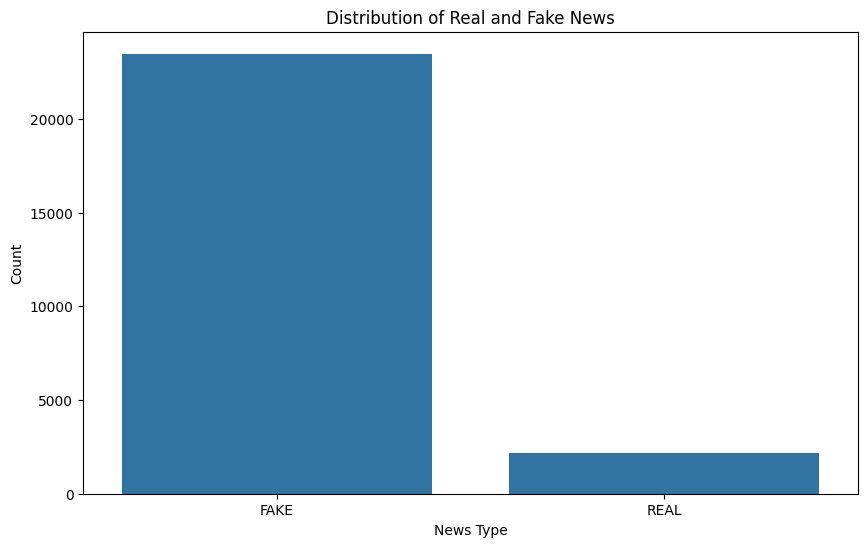

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of real and fake news
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=data)
plt.title('Distribution of Real and Fake News')
plt.xlabel('News Type')
plt.ylabel('Count')
plt.show()


In [36]:
#Vectorize the Text Data
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#Transform the text data using TfidfVectorizer

In [37]:
count_vectorizer = CountVectorizer(stop_words='english', max_features=20)
count_data = count_vectorizer.fit_transform(data['text'])

In [38]:
# Get the top words
top_words = count_vectorizer.get_feature_names_out()
word_counts = count_data.toarray().sum(axis=0)

In [39]:
# Create a dataframe for plotting
word_freq = pd.DataFrame({'word': top_words, 'count': word_counts})

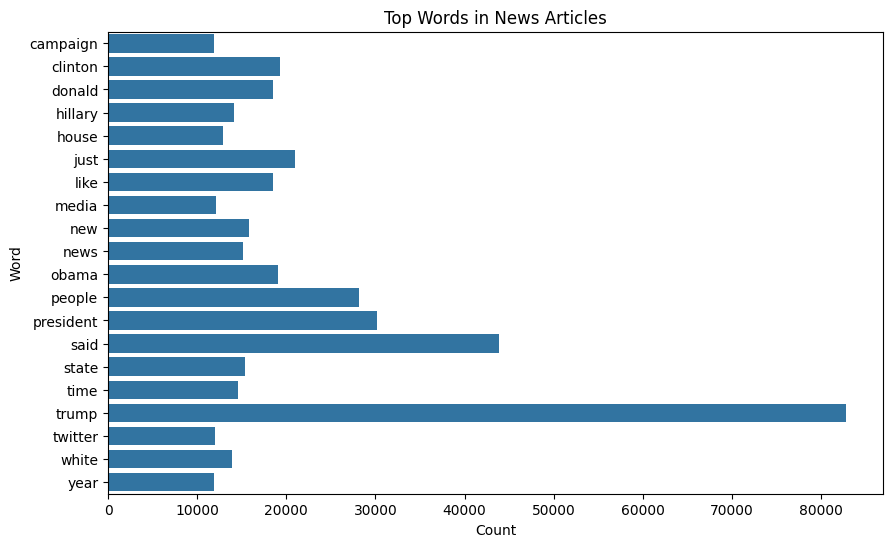

In [40]:
# Plot the top words
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=word_freq)
plt.title('Top Words in News Articles')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

In [23]:
# Fit and transform the data
tfidf_data = tfidf_vectorizer.fit_transform(data['text'])

In [24]:
#Build and Train the Model
#Train the PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [25]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_data, data['label'], test_size=0.2, random_state=42)

In [26]:
# Initialize the PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(X_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [27]:
# Predict on the test set
y_pred = pac.predict(X_test)

In [28]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 99.65%


In [29]:
#Evaluate the Model
#Evaluate the model using a confusion matrix.
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[4710    9]
 [   9  407]]


In [ ]:
#Make Predictions
#Make predictions on new data.

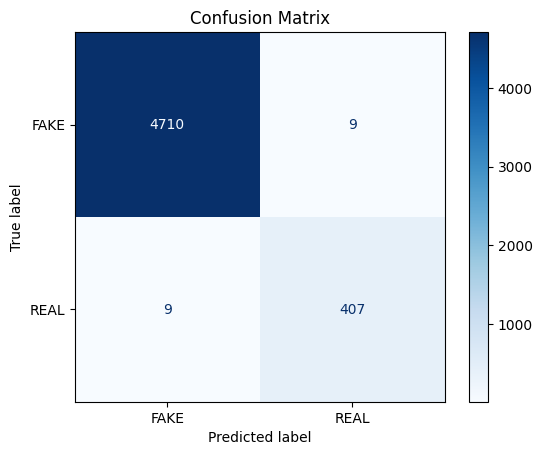

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['FAKE', 'REAL'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [42]:
from wordcloud import WordCloud

In [43]:
# Word cloud for real news
real_news = ' '.join(data[data['label'] == 'REAL']['text'])
real_wordcloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(real_news)


In [44]:

# Word cloud for fake news
fake_news = ' '.join(data[data['label'] == 'FAKE']['text'])
fake_wordcloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(fake_news)


In [45]:
# Plot the word clouds
plt.figure(figsize=(15, 10))


<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

(-0.5, 799.5, 499.5, -0.5)

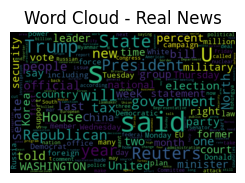

In [46]:
plt.subplot(1, 2, 1)
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Real News')
plt.axis('off')

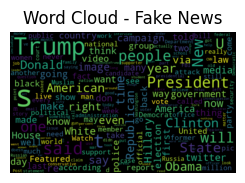

In [47]:

plt.subplot(1, 2, 2)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Fake News')
plt.axis('off')

plt.show()

In [30]:
# Example of predicting on new data
new_data = ["Some new news text here"]
tfidf_new_data = tfidf_vectorizer.transform(new_data)
prediction = pac.predict(tfidf_new_data)
print(prediction)

['FAKE']
